# Setup

In [3]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Clustering

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

## Introduction – Classification _vs_ Clustering

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


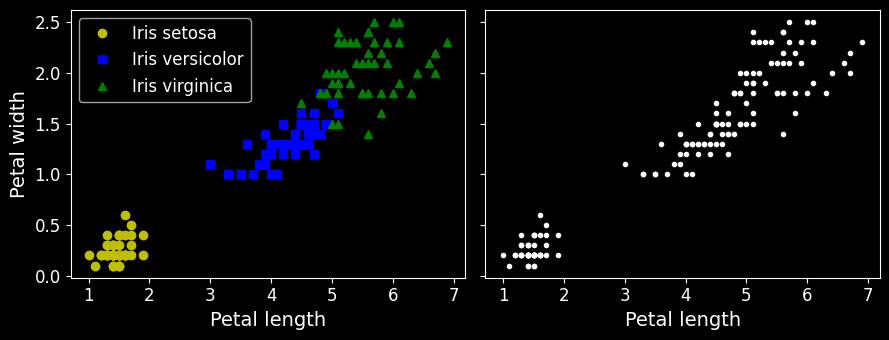

In [5]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="w", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

Un modelo de mezcla gaussiana (explicado más adelante) puede separar bastante bien estos grupos (utilizando las 4 características: longitud y anchura de los pétalos, y longitud y anchura de los sépalos).

In [6]:
from sklearn.cluster import KMeans

k = 3

kmeans = KMeans(n_clusters=k, random_state=101)

y_pred = kmeans.fit_predict(X)



In [7]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
mapping = np.array([1,0,2])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

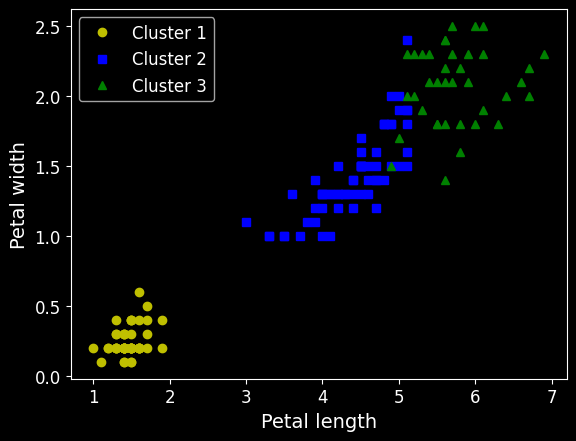

In [10]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [11]:
np.sum(y_pred==y)

134

In [12]:
len(y_pred)

150

In [13]:
np.sum(y_pred==y) / len(y_pred)

0.8933333333333333

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

## K-Means

Empecemos por generar algunas manchas:

In [14]:
from sklearn.datasets import make_blobs

In [15]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [16]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Ahora vamos a graficarlos:

In [17]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


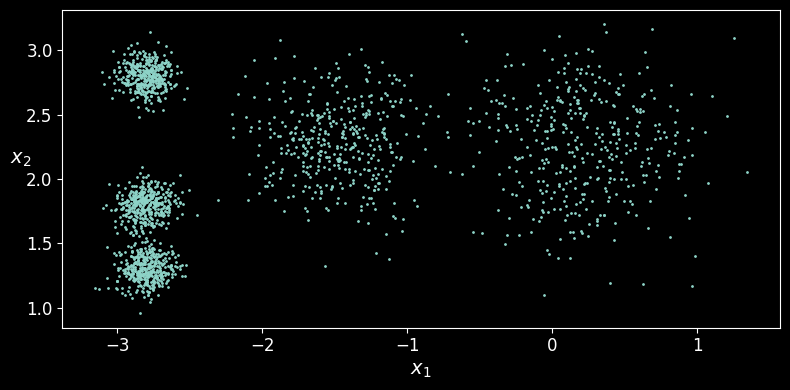

In [18]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

### Fit and Predict

Vamos a entrenar un agrupador K-Means en este conjunto de datos. Intentará encontrar el centro de cada mancha y asignar cada instancia a la mancha más cercana:

In [19]:
from sklearn.cluster import KMeans

In [20]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Cada instancia se asignó a uno de los 5 clusters:

In [21]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [22]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [23]:
y_pred is kmeans.labels_

True

Y se estimaron los siguientes 5 _centroides_ (es decir, centros de conglomerados):

In [24]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Tenga en cuenta que la instancia `KMeans` conserva las etiquetas de las instancias con las que fue entrenada. De forma algo confusa, en este contexto, la _etiqueta_ de una instancia es el índice del cluster al que se asigna esa instancia:

In [25]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

Por supuesto, podemos predecir las etiquetas de las nuevas instancias:

In [26]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5], [-1,2], [-2.5,1.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2, 3, 4])

### Decision Boundaries

Vamos a trazar los límites de decisión del modelo. Esto nos da un _diagrama de Voronoi_:

In [27]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


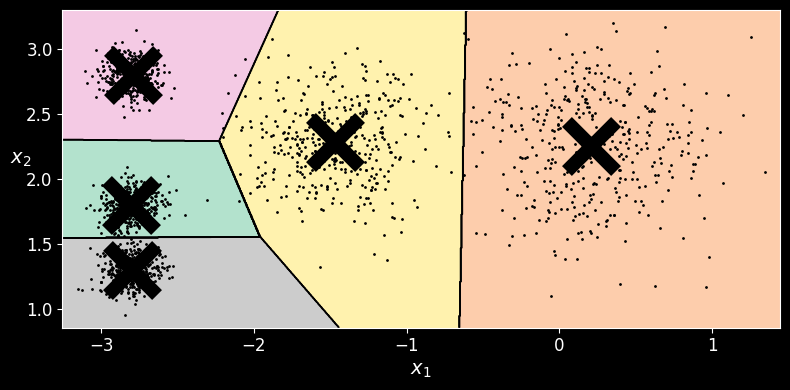

In [28]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

No está mal. Algunas de las instancias cercanas a los bordes probablemente se asignaron al clúster equivocado, pero en general se ve bastante bien.

### Hard Clustering _vs_ Soft Clustering

En lugar de elegir arbitrariamente el cluster más cercano para cada instancia, lo que se llama _hard clustering_, sería mejor medir la distancia de cada instancia a los 5 centroides. Esto es lo que hace el método `transform()`:

In [29]:
X_new

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5],
       [-1. ,  2. ],
       [-2.5,  1.5]])

In [30]:
kmeans.predict(X_new)

array([1, 1, 2, 2, 3, 4])

In [31]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622],
       [1.81481976, 1.23547368, 1.96182856, 0.54736701, 1.93137258],
       [0.42785776, 2.8121518 , 1.32908717, 1.29810491, 0.36041145]])

Puede comprobar que se trata efectivamente de la distancia euclidiana entre cada instancia y cada centroide:

In [32]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622],
       [1.81481976, 1.23547368, 1.96182856, 0.54736701, 1.93137258],
       [0.42785776, 2.8121518 , 1.32908717, 1.29810491, 0.36041145]])

### K-Means Algorithm

El algoritmo K-Means es uno de los algoritmos de agrupación más rápidos, pero también uno de los más sencillos:
* Primero se inicializan $k$ centroides aleatoriamente: se eligen $k$ instancias distintas aleatoriamente del conjunto de datos y se colocan los centroides en sus ubicaciones.
* Repetir hasta la convergencia (es decir, hasta que los centroides dejen de moverse):
    * Asignar cada instancia al centroide más cercano.
    * Actualizar los centroides para que sean la media de las instancias que se les han asignado.

La clase `KMeans` aplica un algoritmo optimizado por defecto. Para obtener el algoritmo original de K-Means (sólo con fines educativos), debe establecer `init="random"`, `n_init=1`y `algorithm="full"`. Estos hiperparámetros se explicarán más adelante.

Vamos a ejecutar el algoritmo K-Means durante 1, 2 y 3 iteraciones, para ver cómo se mueven los centroides:

In [33]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

Y vamos a graficar esto:

Saving figure kmeans_algorithm_plot


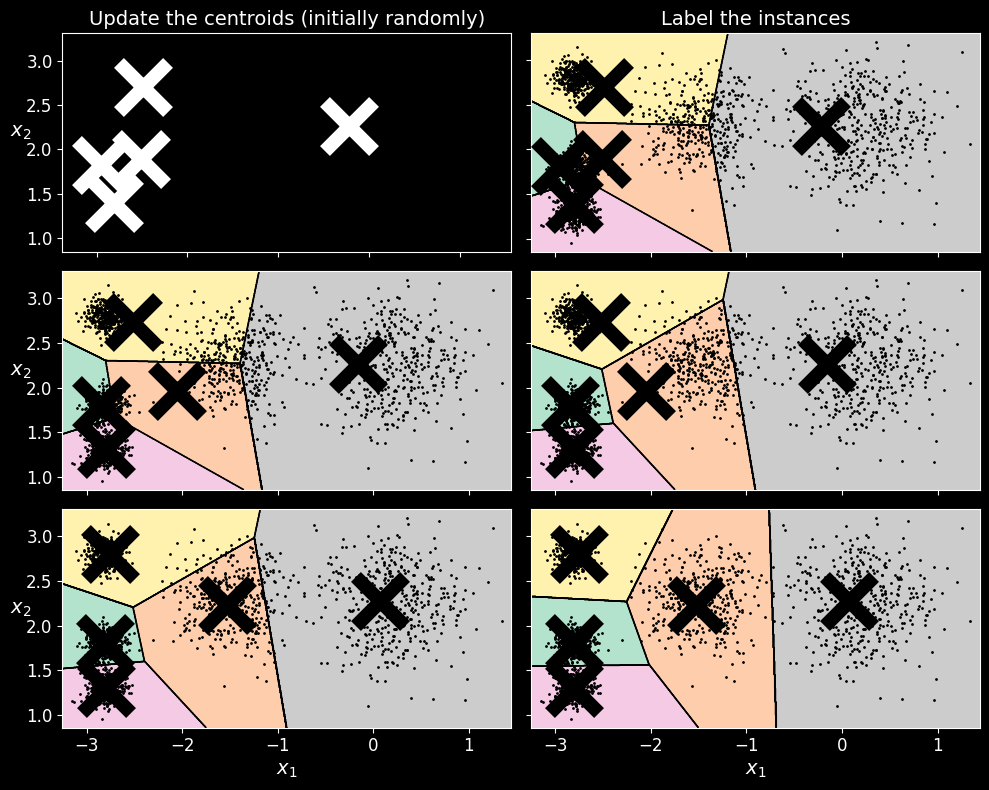

In [34]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

### K-Means Variability

En el algoritmo original de K-Means, los centroides se inicializan aleatoriamente y el algoritmo simplemente ejecuta una única iteración para mejorar gradualmente los centroides, como hemos visto anteriormente.

Sin embargo, uno de los principales problemas de este enfoque es que si se ejecuta K-Means varias veces (o con diferentes semillas aleatorias), puede converger a soluciones muy diferentes, como se puede ver a continuación:

In [35]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure kmeans_variability_plot


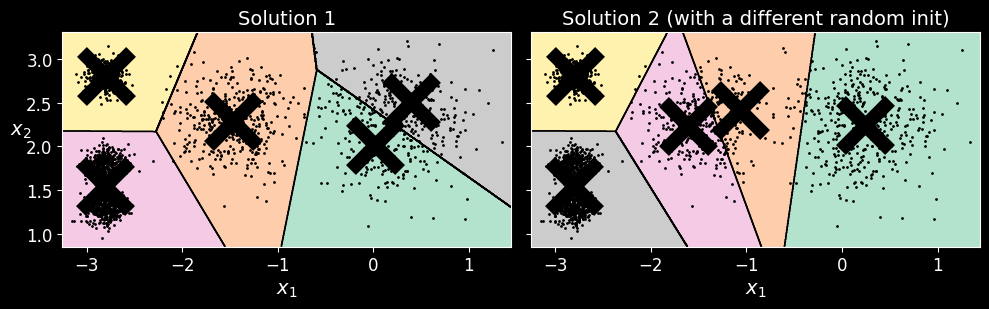

In [37]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

### Inertia

Para seleccionar el mejor modelo, necesitaremos una forma de evaluar el rendimiento de un modelo K-Mean. Por desgracia, la agrupación es una tarea no supervisada, por lo que no disponemos de los objetivos. Pero al menos podemos medir la distancia entre cada instancia y su centroide. Esta es la idea que hay detrás de la métrica _inertia_:

In [36]:
kmeans.inertia_

211.59853725816836

Como se puede comprobar fácilmente, la inercia es la suma de las distancias al cuadrado entre cada instancia de entrenamiento y su centroide más cercano:

In [76]:
kmeans.transform(X)

array([[0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795],
       [0.07122059, 3.11541584, 0.99002955, 1.48612753, 0.51431557],
       [3.81713488, 1.32016676, 4.09069201, 2.67154781, 3.76340605],
       ...,
       [0.92830156, 3.04886464, 0.06769209, 1.40795651, 1.42865797],
       [3.10300136, 0.14895409, 3.05913478, 1.71125   , 3.23385668],
       [0.22700281, 2.8625311 , 0.85434589, 1.21678483, 0.67518173]])

In [31]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [78]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

El método `score()` devuelve la inercia negativa. ¿Por qué negativa? Pues porque el método `score()` de un predictor debe respetar siempre la regla "_más grande es mejor_".

In [79]:
kmeans.score(X)

-211.5985372581684

### Multiple Initializations

Por tanto, un método para resolver el problema de la variabilidad consiste simplemente en ejecutar el algoritmo K-Means varias veces con diferentes inicializaciones aleatorias y seleccionar la solución que minimice la inercia. Por ejemplo, aquí están las inercias de los dos modelos "malos" mostrados en la figura anterior:

In [80]:
kmeans_rnd_init1.inertia_

223.29108572819044

In [81]:
kmeans_rnd_init2.inertia_

237.46249169442856

Como puedes ver, tienen una inercia mayor que el primer modelo "bueno" que entrenamos, lo que significa que probablemente sean peores.

Al establecer el hiperparámetro `n_init`, Scikit-Learn ejecuta el algoritmo original `n_init` veces y selecciona la solución que minimiza la inercia. Por defecto, Scikit-Learn establece `n_init=10`.

In [38]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=100,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, n_init=100,
       random_state=11)

In [39]:
kmeans_rnd_10_inits.inertia_

211.5985372581684

Como se puede ver, terminamos con el modelo inicial, que es sin duda la solución óptima de K-Means (al menos en términos de inercia, y suponiendo $k=5$).

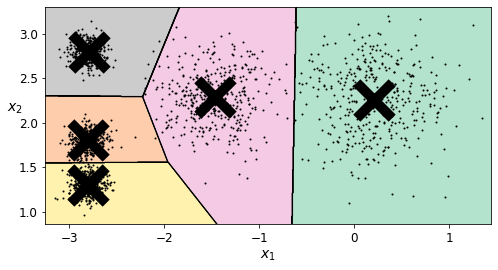

In [85]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### K-Means++

En lugar de inicializar los centroides de forma totalmente aleatoria, es preferible inicializarlos utilizando el siguiente algoritmo, propuesto en un [documento de 2006](https://goo.gl/eNUPw6) por David Arthur y Sergei Vassilvitskii:
* Tomar un centroide $c_1$, elegido uniformemente al azar del conjunto de datos.
* Tomar un nuevo centroide $c_i$, eligiendo una instancia $\mathbf{x}_i$ con probabilidad $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ donde $D(\mathbf{x}_i)$ es la distancia entre la instancia $\mathbf{x}_i$ y el centroide más cercano ya elegido. Esta distribución de probabilidad asegura que las instancias que están más lejos de los centroides ya elegidos tienen muchas más probabilidades de ser seleccionadas como centroides.
* Repita el paso anterior hasta que se hayan elegido todos los $k$ centroides.

El resto del algoritmo K-Means++ es K-Means normal. Con esta inicialización, es mucho menos probable que el algoritmo K-Means converja a una solución subóptima, por lo que es posible reducir `n_init` considerablemente. La mayoría de las veces, esto compensa en gran medida la complejidad adicional del proceso de inicialización.

Para establecer la inicialización a K-Means++, simplemente establezca `init="k-means++"` (de hecho, este es el valor predeterminado):

In [40]:
KMeans()

KMeans()

In [41]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### Accelerated K-Means

El algoritmo K-Means puede acelerarse significativamente evitando muchos cálculos de distancia innecesarios: esto se consigue explotando la desigualdad del triángulo (dados tres puntos A, B y C, la distancia AC es siempre tal que AC ≤ AB + BC) y llevando un registro de los límites inferior y superior de las distancias entre instancias y centroides (para más detalles, véase este [artículo de 2003](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) de Charles Elkan).

Para utilizar la variante de Elkan de K-Means, basta con establecer `algorithm="elkan"`. Tenga en cuenta que no soporta datos dispersos, por lo que, por defecto, Scikit-Learn utiliza `"elkan"` para datos densos, y `"full"` (el algoritmo regular de K-Means) para datos dispersos.

In [42]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

105 ms ± 24.8 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [43]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

129 ms ± 80.6 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini-Batch K-Means

Scikit-Learn también implementa una variante del algoritmo K-Means que admite minilotes (véase [este documento](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [44]:
from sklearn.cluster import MiniBatchKMeans

In [45]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [46]:
minibatch_kmeans.inertia_

211.65239850433204

Si el conjunto de datos no cabe en memoria, la opción más sencilla es utilizar la clase `memmap`, tal y como hicimos para el PCA incremental en el capítulo anterior. Primero carguemos MNIST:

In [47]:
import urllib
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

A continuación, vamos a escribirlo en un `memmap`:

In [49]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [50]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

Si tus datos son tan grandes que no puedes usar `memmap`, las cosas se complican. Empecemos escribiendo una función para cargar el siguiente lote (en la vida real, cargarías los datos desde el disco):

In [51]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

Ahora podemos entrenar el modelo alimentándolo de un lote cada vez. También tenemos que implementar inicializaciones múltiples y quedarnos con el modelo con menor inercia:

In [52]:
np.random.seed(42)

In [53]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [54]:
best_kmeans.score(X)

-211.62571878891143

K-Means minilote es mucho más rápido que K-Means normal:

In [52]:
%timeit KMeans(n_clusters=5).fit(X)

47 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

26.2 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


¡Eso es *mucho* más rápido! Sin embargo, su rendimiento suele ser inferior (mayor inercia), y sigue degradándose a medida que _k_ aumenta. Tracemos la relación de inercia y la relación de tiempo de entrenamiento entre Mini-batch K-Means y K-Means normal:

In [55]:
from timeit import timeit

In [56]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

Saving figure minibatch_kmeans_vs_kmeans


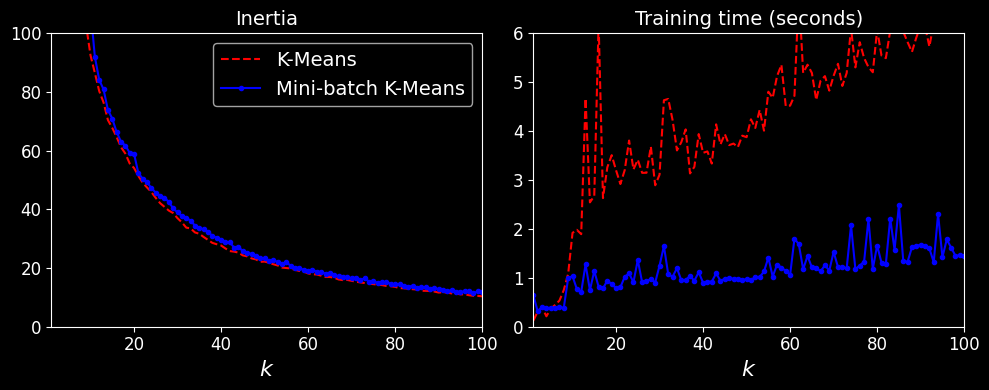

In [57]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

### Finding the optimal number of clusters

¿Y si el número de clusters se fija en un valor inferior o superior a 5?

Saving figure bad_n_clusters_plot


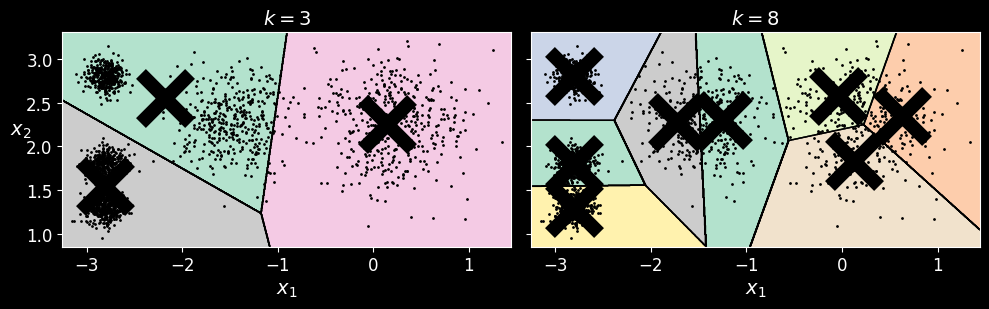

In [58]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

Ouch, estos dos modelos no se ven muy bien. ¿Y sus inercias?

In [59]:
kmeans_k3.inertia_

653.2167190021552

In [60]:
kmeans_k8.inertia_

119.11983416102879

No, no podemos tomar simplemente el valor de $k$ que minimiza la inercia, ya que ésta sigue disminuyendo a medida que aumentamos $k$. De hecho, cuantos más conglomerados haya, más cerca estará cada instancia de su centroide más cercano y, por tanto, menor será la inercia. Sin embargo, podemos representar la inercia en función de $k$ y analizar la curva resultante:

In [61]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [62]:
import pandas as pd

In [63]:
df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
df_kmeans['inertia_1'] = df_kmeans['inertia'].shift(1)
df_kmeans['diff%'] = df_kmeans['inertia']/df_kmeans['inertia_1']
df_kmeans

inertia    inertia_1     diff%
0  3534.836087          NaN       NaN
1  1149.614072  3534.836087  0.325224
2   653.216719  1149.614072  0.568205
3   261.796778   653.216719  0.400781
4   211.598537   261.796778  0.808255
5   169.237154   211.598537  0.799803
6   141.383365   169.237154  0.835416
7   119.119834   141.383365  0.842531
8   102.596787   119.119834  0.861291

Saving figure inertia_vs_k_plot


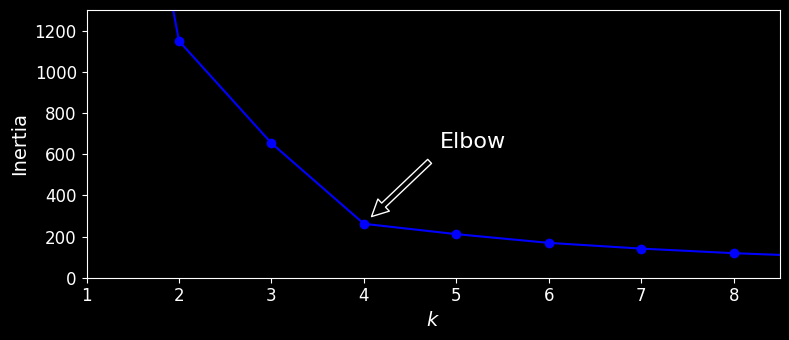

In [64]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

Como se puede ver, hay un codo en $k=4$, lo que significa que menos agrupaciones que ésa serían malas, y más agrupaciones no ayudarían mucho y podrían reducir las agrupaciones a la mitad. Así que $k=4$ es una buena elección. Por supuesto, en este ejemplo no es perfecto, ya que significa que las dos manchas de la parte inferior izquierda se considerarán como un solo conglomerado, pero no deja de ser una agrupación bastante buena.

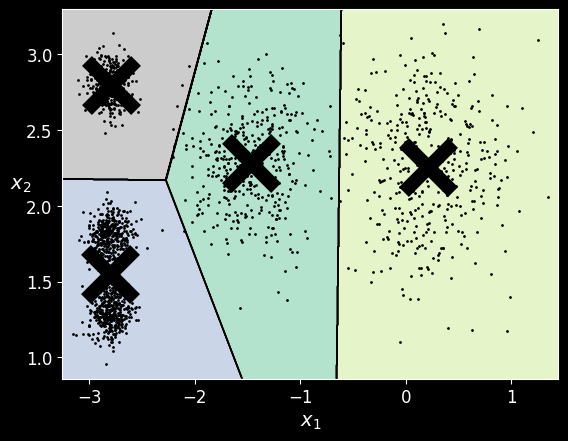

In [65]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Otro enfoque consiste en observar la _puntuación de silueta_, que es el _coeficiente de silueta_ medio de todas las instancias. El coeficiente de silueta de una instancia es igual a $(b - a)/\max(a, b)$ donde $a$ es la distancia media a las otras instancias del mismo cluster (es la _distancia media intra-cluster_), y $b$ es la _distancia media al cluster más cercano_, es decir, la distancia media a las instancias del siguiente cluster más cercano (definido como el que minimiza $b$, excluyendo el propio cluster de la instancia). El coeficiente de silueta puede variar entre -1 y +1: un coeficiente cercano a +1 significa que la instancia está bien dentro de su propio cluster y lejos de otros clusters, mientras que un coeficiente cercano a 0 significa que está cerca del límite de un cluster, y finalmente un coeficiente cercano a -1 significa que la instancia puede haber sido asignada al cluster equivocado.

Vamos a trazar la puntuación de la silueta en función de $k$:

In [66]:
from sklearn.metrics import silhouette_score

In [67]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [68]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


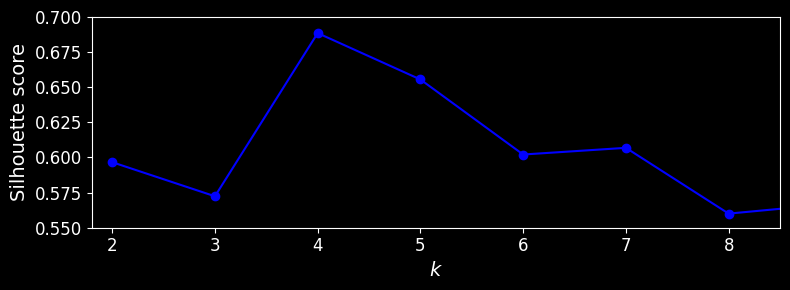

In [69]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

Como puede ver, esta visualización es mucho más rica que la anterior: en particular, aunque confirma que $k=4$ es una muy buena elección, también subraya el hecho de que $k=5$ es bastante buena también.

El coeficiente de silueta de cada instancia, ordenado por el cluster al que está asignado y por el valor del coeficiente, ofrece una visualización aún más informativa. Esto se denomina _diagrama de siluetas_:

Saving figure silhouette_analysis_plot


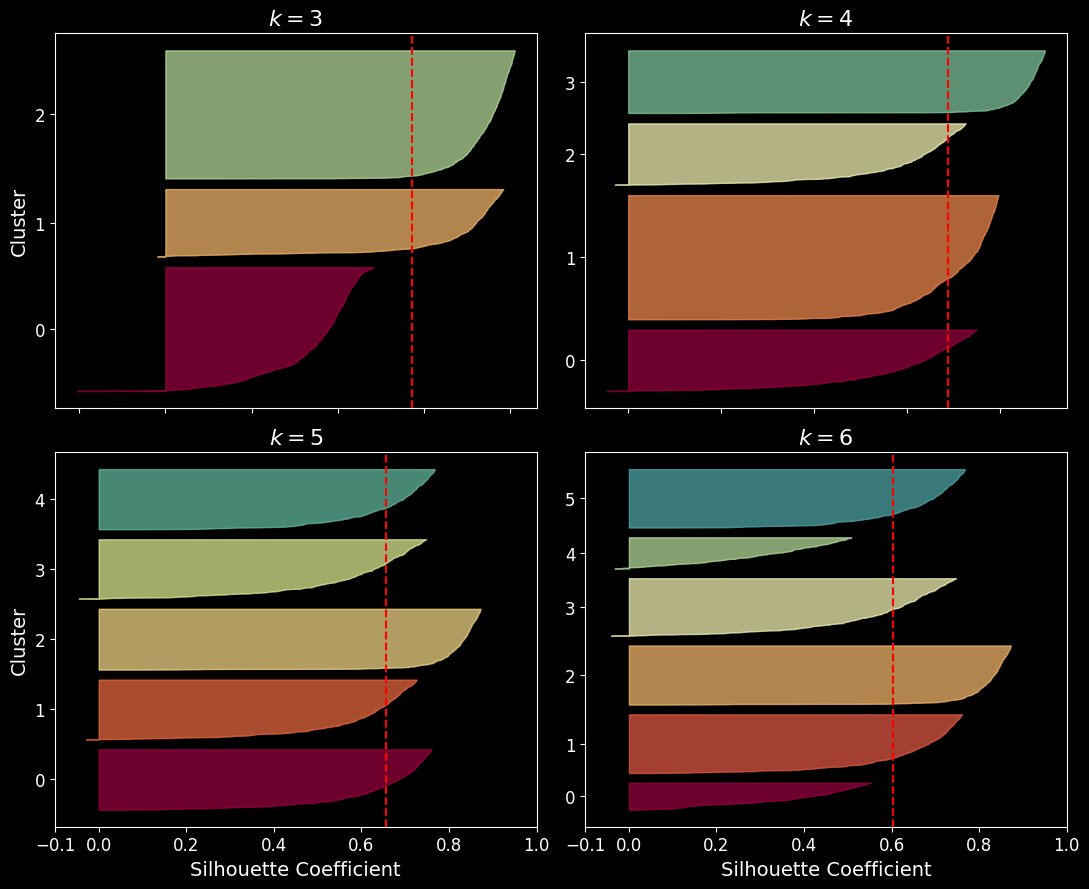

In [70]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

### Limits of K-Means

In [71]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

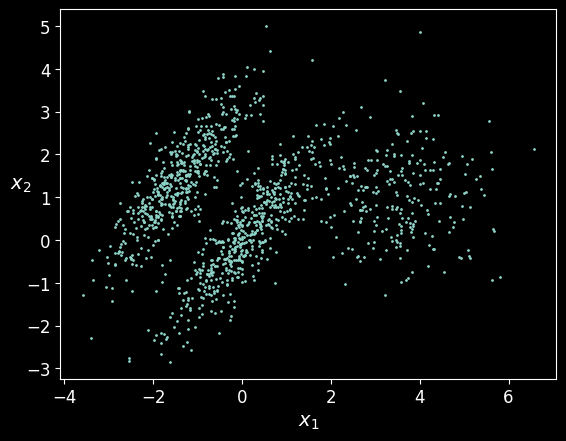

In [72]:
plot_clusters(X)

In [73]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

Saving figure bad_kmeans_plot


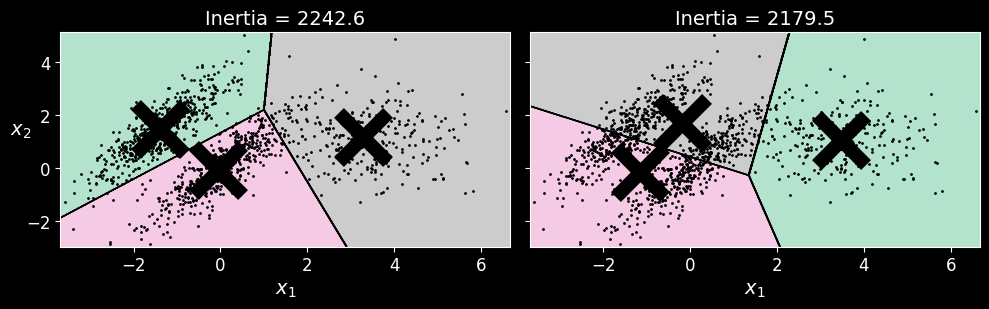

In [74]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()

# IN CLASS

### Uso del clustering para la segmentación de imágenes

In [75]:
import urllib
import os 
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x1abc0db8ac8>)

In [89]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

seed = 42
# los píxeles están normalizados
# Where to save the figures
image = imread("./images/unsupervised_learning/ladybug.png")
image.shape

(533, 800, 3)

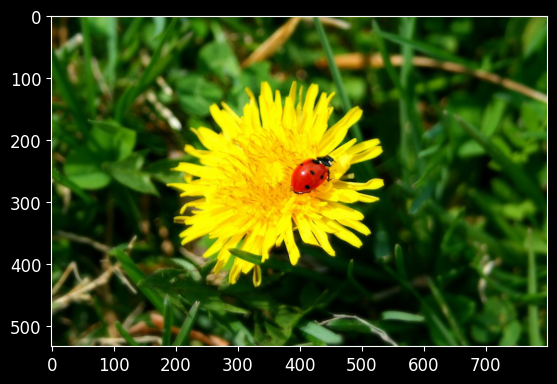

In [90]:
plt.imshow(image)

In [91]:
image.size

1279200

In [92]:
image[0].shape

(800, 3)

In [93]:
image[0][0]

array([0.09803922, 0.11372549, 0.00784314], dtype=float32)

In [94]:
image[300][400][2]  # azul del píxel 300 alto y 400 ancho

0.015686275

In [95]:
max_value = 0
for fila in image:
    for altura in fila:
        if max(altura) > max_value:
            max_value = max(altura)
print(max_value)

1.0


In [96]:
image.reshape(-1,3).shape  # 533x800 por cada color

(426400, 3)

In [97]:
image.reshape(-1,3)[0]

array([0.09803922, 0.11372549, 0.00784314], dtype=float32)

In [98]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=20, random_state=seed).fit(X)

In [99]:
kmeans.labels_

array([ 9,  9,  9, ..., 19, 19, 19])

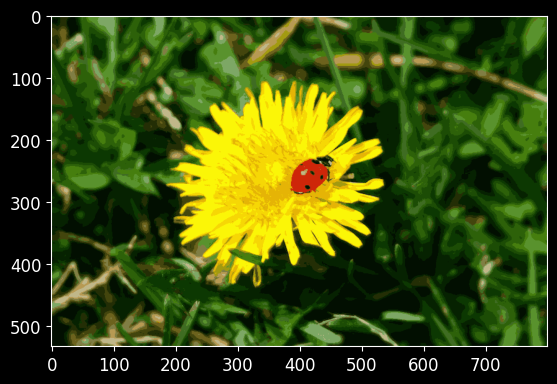

In [100]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
#print("segmented_img:", segmented_img)

plt.imshow(segmented_img)

In [101]:
print("resolución image:", image.shape)
print("primera fila:", image[0].shape)
print("primera fila & primera columna:", image[0][0].shape)
print("primera fila & primera columna:", image[0][0])

resolución image: (533, 800, 3)
primera fila: (800, 3)
primera fila & primera columna: (3,)
primera fila & primera columna: [0.09803922 0.11372549 0.00784314]


In [102]:
print(image[0][1])
print(image[0][0])
print(image[0][2])

[0.09411765 0.10980392 0.00392157]
[0.09803922 0.11372549 0.00784314]
[0.09411765 0.11372549 0.        ]


In [103]:
print(segmented_img[0][1])
print(segmented_img[0][0])
print(segmented_img[0][2])

[0.02637219 0.13401619 0.00606897]
[0.02637219 0.13401619 0.00606897]
[0.02637219 0.13401619 0.00606897]


In [104]:
segmented_imgs = []
n_colors = (12, 10, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [105]:
kmeans.cluster_centers_

array([[0.8608752 , 0.8004718 , 0.10489635],
       [0.13367681, 0.26555252, 0.04000121]], dtype=float32)

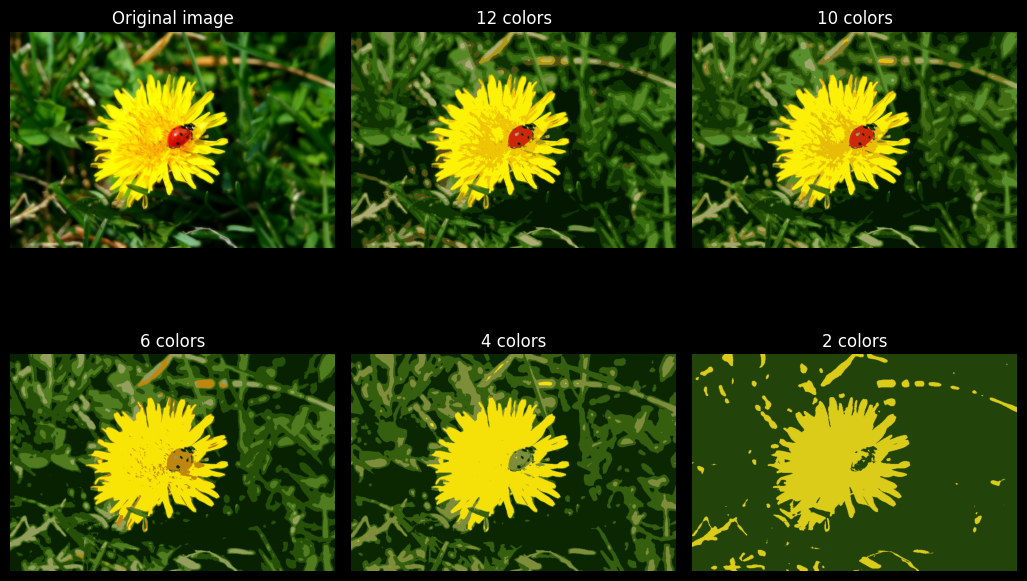

In [106]:
plt.figure(figsize=(13,8))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

#save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

### Using Clustering for Preprocessing

Vamos a abordar el conjunto de datos _digits_, que es un conjunto de datos sencillo similar al MNIST que contiene 1.797 imágenes de 8×8 en escala de grises que representan los dígitos del 0 al 9.

In [107]:
from sklearn.datasets import load_digits

In [108]:
X_digits, y_digits = load_digits(return_X_y=True)

Vamos a dividirlo en un conjunto de entrenamiento y un conjunto de prueba:

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

Ahora vamos a ajustar un modelo de regresión logística y evaluarlo en el conjunto de pruebas:

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [113]:
log_reg.score(X_test, y_test)

0.9688888888888889

Bien, esa es nuestra línea de base: 96,89% de precisión. Veamos si podemos hacerlo mejor utilizando K-Means como paso previo al procesamiento. Crearemos un proceso que primero agrupará el conjunto de entrenamiento en 50 clústeres y reemplazará las imágenes con sus distancias a los 50 clústeres, luego aplicará un modelo de regresión logística:

In [114]:
from sklearn.pipeline import Pipeline

In [117]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=30, random_state=42)), # Utiliza solo X_train
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),# Utiliza X_train, y_train
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=30, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [118]:
pipeline.score(X_test, y_test)

0.9733333333333334

¿Qué le parece? Hemos reducido la tasa de error en más de un 28%. Pero elegimos el número de conglomerados $k$ de forma completamente arbitraria, seguro que podemos hacerlo mejor. Dado que K-Means es sólo un paso de preprocesamiento en un proceso de clasificación, encontrar un buen valor para $k$ es mucho más sencillo que antes: no hay necesidad de realizar análisis de silueta o minimizar la inercia, el mejor valor de $k$ es simplemente el que resulta en el mejor rendimiento de clasificación.

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid = {"kmeans__n_clusters": range(2, 100)}

grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=30, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

Let's see what the best number of clusters is:

In [121]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [122]:
grid_clf.score(X_test, y_test)

0.9777777777777777

### Clustering for Semi-supervised Learning

Otro caso de uso de la agrupación es el aprendizaje semisupervisado, cuando tenemos muchas instancias sin etiquetar y muy pocas etiquetadas.

Veamos el rendimiento de un modelo de regresión logística cuando sólo tenemos 50 instancias etiquetadas:

In [123]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [124]:
# Con todas las imágenes
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42, max_iter=5000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9688888888888889

In [125]:
n_labeled = 50

In [126]:
# Con 50 imágenes
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

Es mucho menos que antes, por supuesto. Veamos cómo podemos hacerlo mejor. En primer lugar, agrupemos el conjunto de entrenamiento en 50 clusters y, a continuación, busquemos en cada cluster la imagen más cercana al centroide. A estas imágenes las llamaremos imágenes representativas:

In [127]:
k = 50

In [128]:
kmeans = KMeans(n_clusters=k, random_state=42)
# Con esto estamos encontrando las 50 imágenes más representativas del conjunto 'X_train'
print("X_train.shape:", X_train.shape)
print("X_train[0].shape:", X_train[0].shape)
X_digits_dist = kmeans.fit_transform(X_train)
# Cogemos las imágenes que menos distacia tengan a los 50 centroides
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
print("representative_digit_idx:", representative_digit_idx)
X_representative_digits = X_train[representative_digit_idx]

X_train.shape: (1347, 64)
X_train[0].shape: (64,)
representative_digit_idx: [ 911  559   23  159  736 1056  776  795  753  598  737  683 1194  602
  817 1284   73  702   94  891  805 1071 1314 1022 1050  525  588  481
 1005  766  848  731  749 1322 1336  705 1151  494  357  459  843  850
  151  256  576  460  596  648  841  214]


In [129]:
X_representative_digits[0]

array([ 0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  1.,  7.,  0.,  0.,  9.,
       14.,  0.,  2., 13., 14.,  0.,  0.,  8., 16., 14., 15., 16.,  6.,
        0.,  0.,  1.,  7.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7.,
       16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.])

Now let's plot these representative images and label them manually:

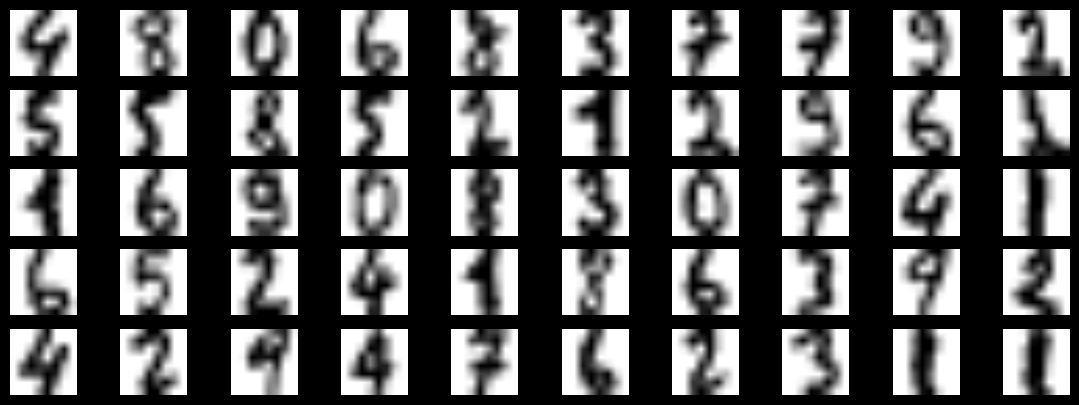

In [130]:
plt.figure(figsize=(14, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

# save_fig("representative_images_diagram", tight_layout=False)
plt.show()

Ahora tenemos un conjunto de datos con sólo 50 instancias etiquetadas, pero en lugar de ser instancias completamente aleatorias, cada una de ellas es una imagen representativa de su clúster. Veamos si el rendimiento es mejor:

In [131]:
y_representative_digits = [list(y_train)[x] for x in representative_digit_idx]

In [132]:
len(y_representative_digits)

50

In [133]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

¡Vaya! Hemos pasado de una precisión del 83,3% al 92,2%, aunque todavía sólo estamos entrenando el modelo con 50 instancias. Dado que a menudo es costoso y doloroso etiquetar instancias, especialmente cuando lo tienen que hacer manualmente los expertos, es una buena idea hacer que etiqueten instancias representativas en lugar de instancias aleatorias.

Pero quizá podamos ir un paso más allá: ¿y si propagamos las etiquetas a todas las demás instancias del mismo clúster?

In [134]:
print("X_train.shape:", X_train.shape)

X_train.shape: (1347, 64)


In [135]:
1347 - 50

1297

In [136]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
# Para cada uno de los dígitos que están en los diferentes clusters, forzamos a que se le asigne la etiqueta del dígito que está más cerca del centroide.
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
y_train_propagated

array([5, 2, 0, ..., 2, 7, 1])

In [137]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [138]:
log_reg.score(X_test, y_test)

0.9333333333333333

Hemos conseguido un pequeño aumento de la precisión. Mejor que nada, pero probablemente deberíamos haber propagado las etiquetas sólo a las instancias más cercanas al centroide, porque al propagarlas a todo el clúster, sin duda hemos incluido algunos valores atípicos. Propaguemos las etiquetas sólo al percentil 20 más cercano al centroide:

In [139]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [140]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [141]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [142]:
log_reg.score(X_test, y_test)

0.94

¡Muy bueno! Con sólo 50 instancias etiquetadas (¡sólo 5 ejemplos por clase de media!), obtuvimos un rendimiento del 94%, que se acerca bastante al rendimiento de la regresión logística en el conjunto de datos _digits_ totalmente etiquetado (que fue del 96,9%).

Esto se debe a que las etiquetas propagadas son en realidad bastante buenas: su precisión es muy cercana al 99%:

In [143]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

Ahora podrías hacer algunas iteraciones de *aprendizaje activo*:
1. 1. Etiquetar manualmente las instancias de las que el clasificador está menos seguro, si es posible, agrupándolas en clusters distintos.
2. 2. Entrenar un nuevo modelo con estas etiquetas adicionales.

## DBSCAN

In [144]:
from sklearn.datasets import make_moons

In [145]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [146]:
from sklearn.cluster import DBSCAN

In [147]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [148]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [149]:
len(dbscan.core_sample_indices_)

808

In [150]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [151]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [152]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [153]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [154]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_plot


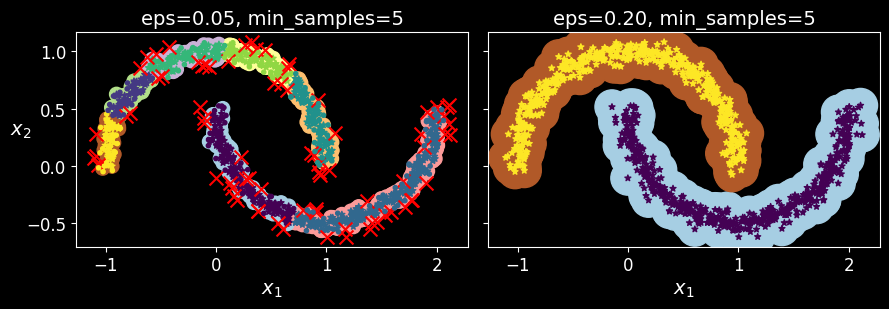

In [155]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()


In [156]:
dbscan = dbscan2

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [159]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [160]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Saving figure cluster_classification_plot


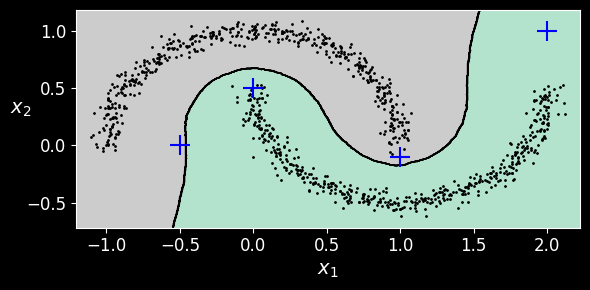

In [161]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [162]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

## Other Clustering Algorithms

### Spectral Clustering

In [126]:
from sklearn.cluster import SpectralClustering

In [127]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=100, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=42)

In [128]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=42)

In [129]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [130]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

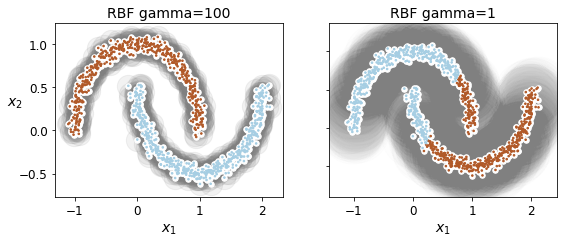

In [131]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()


### Agglomerative Clustering

In [132]:
from sklearn.cluster import AgglomerativeClustering

In [133]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [134]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [135]:
learned_parameters(agg)

['children_', 'labels_', 'n_components_', 'n_leaves_']

In [136]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

# Gaussian Mixtures

In [137]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Entrenemos un modelo de mezcla gaussiana con el conjunto de datos anterior:

In [138]:
from sklearn.mixture import GaussianMixture

In [139]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Let's look at the parameters that the EM algorithm estimated:

In [140]:
gm.weights_

array([0.20965228, 0.4000662 , 0.39028152])

In [141]:
gm.means_

array([[ 3.39909717,  1.05933727],
       [-1.40763984,  1.42710194],
       [ 0.05135313,  0.07524095]])

In [142]:
gm.covariances_

array([[[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

¿Ha convergido realmente el algoritmo?

In [143]:
gm.converged_

True

Sí, bien. ¿Cuántas iteraciones tomó?

In [144]:
gm.n_iter_

4

Ahora puede utilizar el modelo para predecir a qué cluster pertenece cada instancia (hard clustering) o las probabilidades de que proceda de cada cluster. Para ello, utilice el método `predict()` o el método `predict_proba()`:

In [145]:
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0])

In [146]:
gm.predict_proba(X)

array([[2.32389467e-02, 6.77397850e-07, 9.76760376e-01],
       [1.64685609e-02, 6.75361303e-04, 9.82856078e-01],
       [2.01535333e-06, 9.99923053e-01, 7.49319577e-05],
       ...,
       [9.99999571e-01, 2.13946075e-26, 4.28788333e-07],
       [1.00000000e+00, 1.46454409e-41, 5.12459171e-16],
       [1.00000000e+00, 8.02006365e-41, 2.27626238e-15]])

Se trata de un modelo generativo, por lo que puede muestrear nuevas instancias a partir de él (y obtener sus etiquetas):

In [147]:
X_new, y_new = gm.sample(6)
X_new

array([[ 2.95400315,  2.63680992],
       [-1.16654575,  1.62792705],
       [-1.39477712, -1.48511338],
       [ 0.27221525,  0.690366  ],
       [ 0.54095936,  0.48591934],
       [ 0.38064009, -0.56240465]])

In [148]:
y_new

array([0, 1, 2, 2, 2, 2])

Obsérvese que se muestrean secuencialmente de cada cluster.

También puede estimar el logaritmo de la _función de densidad de probabilidad_ (PDF) en cualquier lugar utilizando el método `score_samples()`:

In [149]:
gm.score_samples(X)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

Comprobemos que la PDF se integra a 1 en todo el espacio. Tomamos un cuadrado grande alrededor de los conglomerados y lo dividimos en una cuadrícula de cuadrados diminutos; a continuación, calculamos la probabilidad aproximada de que las instancias se generen en cada cuadrado diminuto (multiplicando la PDF en una esquina del cuadrado diminuto por el área del cuadrado) y, por último, sumamos todas estas probabilidades). El resultado es muy próximo a 1:

In [150]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999217851

Ahora vamos a trazar los límites de decisión resultantes (líneas discontinuas) y los contornos de densidad:

In [151]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure gaussian_mixtures_diagram


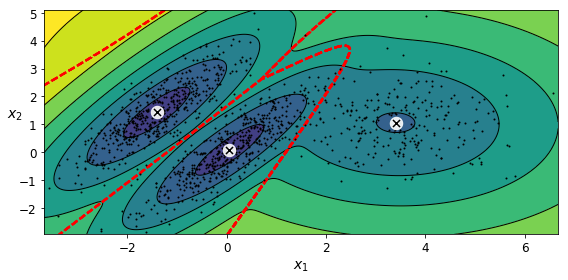

In [152]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

Puede imponer restricciones a las matrices de covarianza que busca el algoritmo estableciendo el hiperparámetro `covariance_type`:
* "completo" (por defecto): sin restricciones, todos los conglomerados pueden tener forma elipsoidal de cualquier tamaño.
* Todos los conglomerados deben tener la misma forma, que puede ser cualquier elipsoide (es decir, todos comparten la misma matriz de covarianza).
* Esférico": todos los conglomerados deben ser esféricos, pero pueden tener diámetros diferentes (es decir, varianzas diferentes).
* `"diag"`: los conglomerados pueden tener cualquier forma elipsoidal de cualquier tamaño, pero los ejes del elipsoide deben ser paralelos a los ejes (es decir, las matrices de covarianza deben ser diagonales).

In [153]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [154]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)


Saving figure covariance_type_diagram


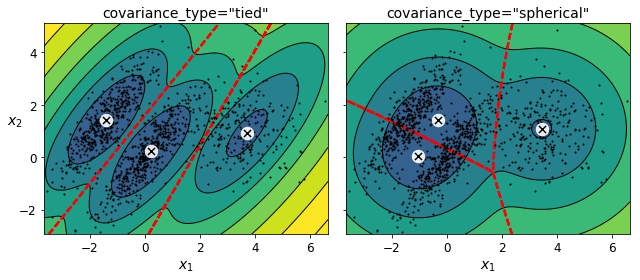

In [155]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

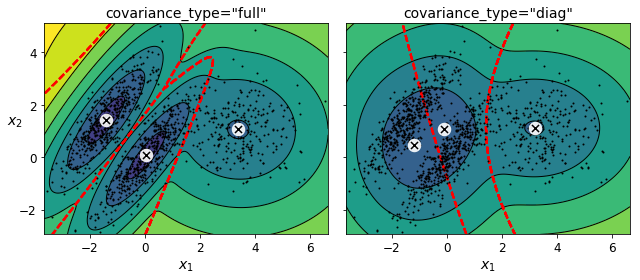

In [156]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## Anomaly Detection using Gaussian Mixtures

Las mezclas gaussianas pueden utilizarse para la _detección de anomalías_: las instancias situadas en regiones de baja densidad pueden considerarse anomalías. Debe definir qué umbral de densidad desea utilizar. Por ejemplo, en una empresa de fabricación que intenta detectar productos defectuosos, la proporción de productos defectuosos suele ser bien conocida. Digamos que es igual a 4%, entonces puede establecer el umbral de densidad para que sea el valor que resulta en tener 4% de las instancias localizadas en áreas por debajo de ese umbral de densidad:

In [157]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

Saving figure mixture_anomaly_detection_diagram


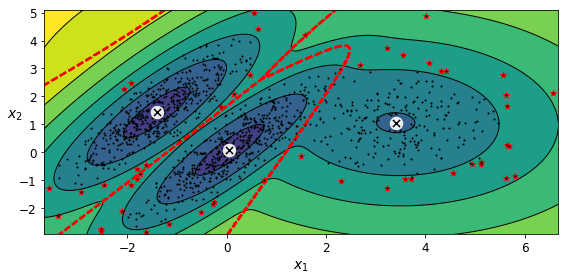

In [158]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

## Model selection

No podemos utilizar la inercia ni la puntuación de silueta porque ambas suponen que los conglomerados son esféricos. En su lugar, podemos intentar encontrar el modelo que minimice un criterio de información teórico como el Criterio de Información Bayesiano (BIC) o el Criterio de Información de Akaike (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$$

* $m$ es el número de instancias.
* $p$ es el número de parámetros aprendidos por el modelo.
* $\hat L$ es el valor maximizado de la función de verosimilitud del modelo. Es la probabilidad condicional de los datos observados $\mathbf{X}$, dado el modelo y sus parámetros optimizados.

Tanto el BIC como el AIC penalizan los modelos que tienen más parámetros que aprender (por ejemplo, más conglomerados), y recompensan los modelos que se ajustan bien a los datos (es decir, los modelos que dan una alta verosimilitud a los datos observados).

In [159]:
gm.bic(X)

8189.74345832983

In [160]:
gm.aic(X)

8102.518178214792

Podríamos calcular el BIC manualmente así:

In [161]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [162]:
bic, aic

(8189.74345832983, 8102.518178214792)

In [163]:
n_params

17

Hay un peso por conglomerado, pero la suma debe ser igual a 1, por lo que tenemos un grado de libertad menos, de ahí el -1. Del mismo modo, los grados de libertad para una matriz de covarianza $n \times n$ no es $n^2$, sino $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

Entrenemos modelos de mezclas gaussianas con varios valores de $k$ y midamos su BIC:

In [164]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [165]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

Saving figure aic_bic_vs_k_diagram


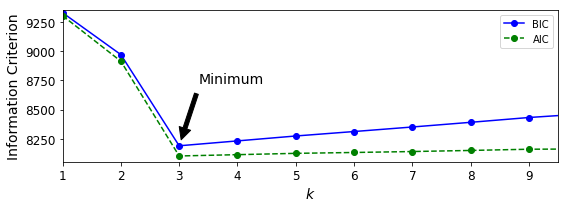

In [166]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("aic_bic_vs_k_plot")
plt.show()

Busquemos la mejor combinación de valores tanto para el número de conglomerados como para el hiperparámetro "tipo_covarianza":

In [167]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [168]:
best_k

3

In [169]:
best_covariance_type

'full'

## Variational Bayesian Gaussian Mixtures

En lugar de buscar manualmente el número óptimo de conglomerados, es posible utilizar en su lugar la clase `BayesianGaussianMixture` que es capaz de dar pesos iguales (o cercanos) a cero a los conglomerados innecesarios. Basta con establecer el número de componentes en un valor que considere superior al número óptimo de conglomerados, y el algoritmo eliminará automáticamente los conglomerados innecesarios.

In [170]:
from sklearn.mixture import BayesianGaussianMixture

In [171]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=10, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

El algoritmo detectó automáticamente que sólo se necesitan 3 componentes:

In [172]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

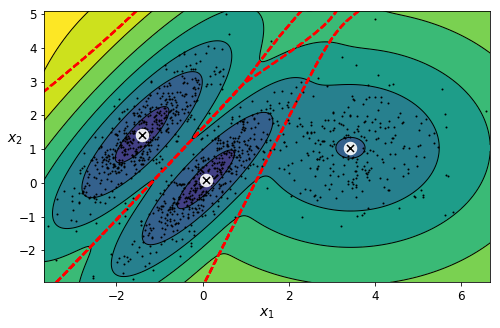

In [173]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [174]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=1000, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=1, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=10000,
            weight_concentration_prior_type='dirichlet_process')

In [175]:
np.round(bgm_low.weights_, 2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [176]:
np.round(bgm_high.weights_, 2)

array([0.01, 0.18, 0.27, 0.11, 0.01, 0.01, 0.01, 0.01, 0.37, 0.01])

Saving figure mixture_concentration_prior_diagram


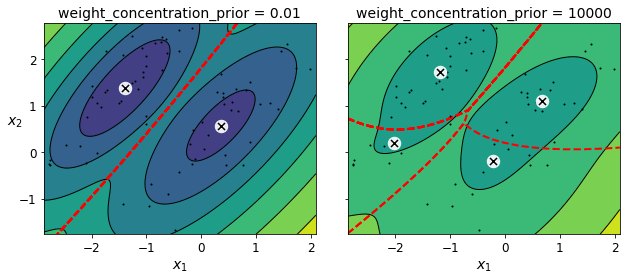

In [177]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

save_fig("mixture_concentration_prior_plot")
plt.show()

Nota: el hecho de que sólo vea 3 regiones en el gráfico de la derecha aunque haya 4 centroides no es un error. El peso del clúster superior derecho es mucho mayor que el peso del clúster inferior derecho, por lo que la probabilidad de que cualquier punto de esta región pertenezca al clúster superior derecho es mayor que la probabilidad de que pertenezca al clúster inferior derecho.

In [178]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [179]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=10, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

Saving figure moons_vs_bgm_diagram


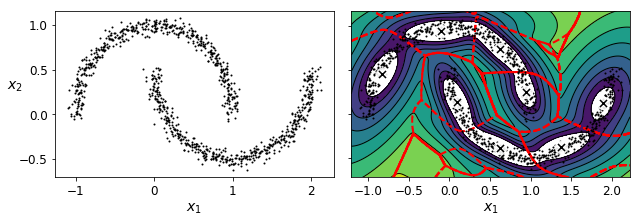

In [180]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("moons_vs_bgm_plot")
plt.show()

Uy, no muy bien... en lugar de detectar 2 conglomerados con forma de luna, el algoritmo detectó 8 conglomerados elipsoidales. Sin embargo, el gráfico de densidad no tiene tan mal aspecto, así que podría servir para detectar anomalías.

## Likelihood Function

En estadística, la función de verosimilitud (o, simplemente, verosimilitud) es una función de los parámetros de un modelo estadístico que permite realizar inferencias acerca de su valor a partir de un conjunto de observaciones.

No debe confundirse con el término probabilidad: esta permite, a partir de una serie de parámetros conocidos, realizar predicciones acerca de los valores que toma una variable aleatoria.

In [4]:
from scipy.stats import norm

In [5]:
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])

Saving figure likelihood_function_plot


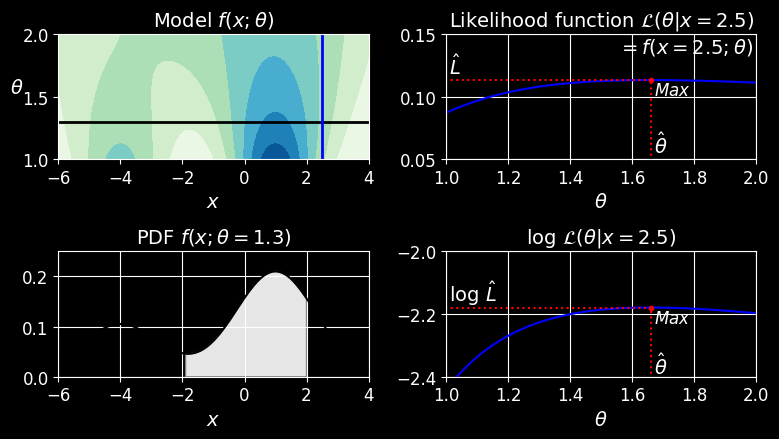

In [6]:
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4.5))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

save_fig("likelihood_function_plot")
plt.show()

# Exercise solutions

## Cluster the Olivetti Faces Dataset

*Ejercicio: El conjunto de datos clásico de rostros Olivetti contiene 400 imágenes de rostros en escala de grises de 64 × 64 píxeles. Cada imagen se aplana a un vector 1D de tamaño 4.096. Se fotografiaron 40 personas diferentes (10 veces cada una), y la tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen. Cargue el conjunto de datos utilizando la función `sklearn.datasets.fetch_olivetti_faces()`.

In [7]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Joan Oliver\scikit_learn_data


In [8]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [9]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

*Ejercicio: A continuación, divídalo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de prueba (tenga en cuenta que el conjunto de datos ya está escalado entre 0 y 1). Como el conjunto de datos es bastante pequeño, probablemente quieras utilizar un muestreo estratificado para asegurarte de que hay el mismo número de imágenes por persona en cada conjunto*.

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [11]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


Para acelerar las cosas, reduciremos la dimensionalidad de los datos mediante PCA:

In [12]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

*Ejercicio: A continuación, agrupa las imágenes utilizando K-Means, y asegúrate de que tienes un buen número de clusters (utilizando una de las técnicas discutidas en este capítulo).*

In [129]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


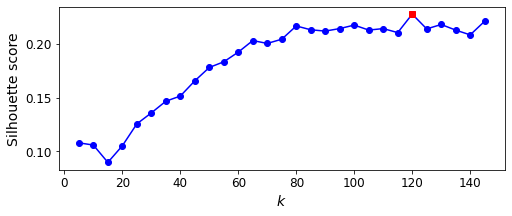

In [130]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [131]:
best_k

120

Parece que el mejor número de grupos es bastante alto, de 120. Cabría esperar que fuera 40, ya que hay 40 personas diferentes en las fotos. Sin embargo, una misma persona puede tener un aspecto muy diferente en distintas fotos (por ejemplo, con o sin gafas, o simplemente desplazada a izquierda o derecha).

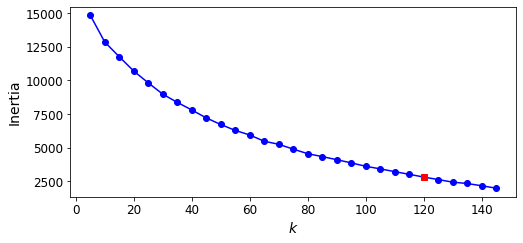

In [132]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

El número óptimo de conglomerados no está claro en este diagrama de inercia, ya que no hay un codo obvio, así que vamos a quedarnos con k=120.

In [14]:
best_model = kmeans_per_k[best_index]

*Ejercicio: Visualiza los grupos: ¿ves caras similares en cada grupo?*

Cluster 0


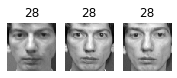

Cluster 1


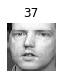

Cluster 2


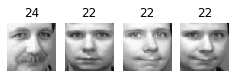

Cluster 3


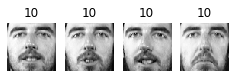

Cluster 4


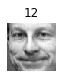

Cluster 5


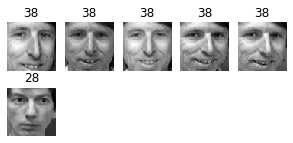

Cluster 6


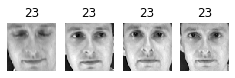

Cluster 7


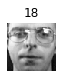

Cluster 8


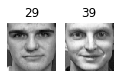

Cluster 9


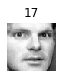

Cluster 10


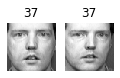

Cluster 11


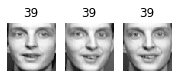

Cluster 12


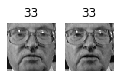

Cluster 13


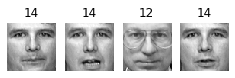

Cluster 14


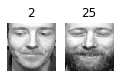

Cluster 15


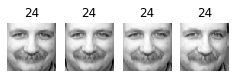

Cluster 16


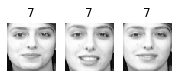

Cluster 17


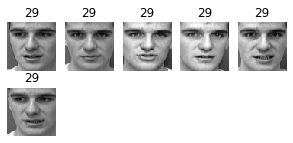

Cluster 18


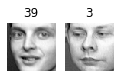

Cluster 19


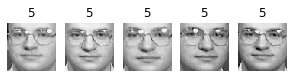

Cluster 20


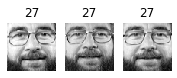

Cluster 21


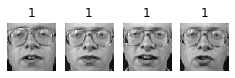

Cluster 22


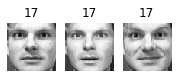

Cluster 23


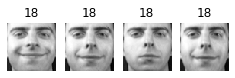

Cluster 24


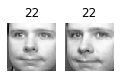

Cluster 25


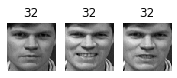

Cluster 26


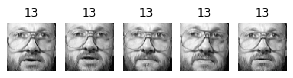

Cluster 27


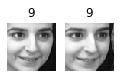

Cluster 28


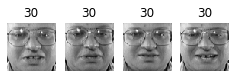

Cluster 29


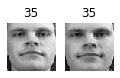

Cluster 30


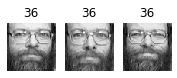

Cluster 31


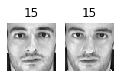

Cluster 32


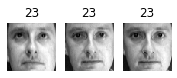

Cluster 33


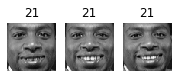

Cluster 34


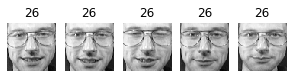

Cluster 35


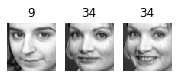

Cluster 36


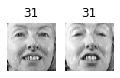

Cluster 37


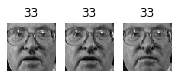

Cluster 38


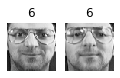

Cluster 39


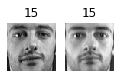

Cluster 40


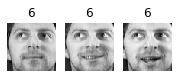

Cluster 41


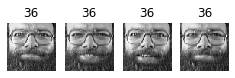

Cluster 42


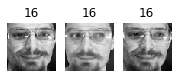

Cluster 43


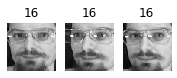

Cluster 44


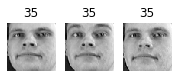

Cluster 45


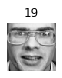

Cluster 46


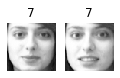

Cluster 47


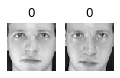

Cluster 48


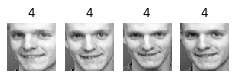

Cluster 49


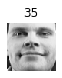

Cluster 50


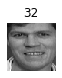

Cluster 51


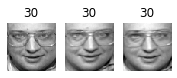

Cluster 52


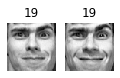

Cluster 53


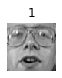

Cluster 54


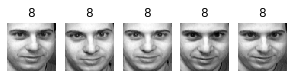

Cluster 55


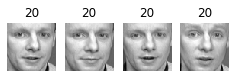

Cluster 56


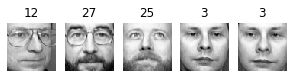

Cluster 57


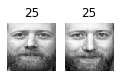

Cluster 58


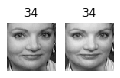

Cluster 59


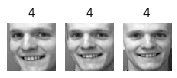

Cluster 60


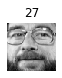

Cluster 61


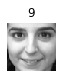

Cluster 62


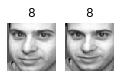

Cluster 63


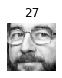

Cluster 64


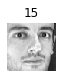

Cluster 65


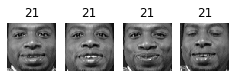

Cluster 66


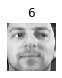

Cluster 67


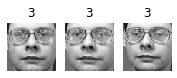

Cluster 68


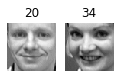

Cluster 69


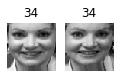

Cluster 70


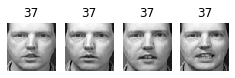

Cluster 71


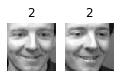

Cluster 72


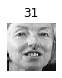

Cluster 73


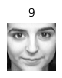

Cluster 74


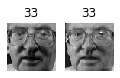

Cluster 75


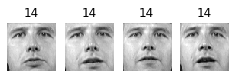

Cluster 76


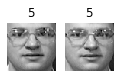

Cluster 77


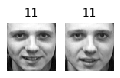

Cluster 78


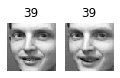

Cluster 79


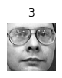

Cluster 80


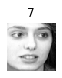

Cluster 81


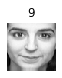

Cluster 82


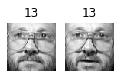

Cluster 83


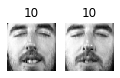

Cluster 84


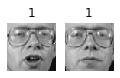

Cluster 85


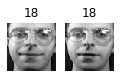

Cluster 86


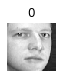

Cluster 87


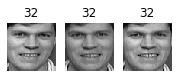

Cluster 88


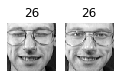

Cluster 89


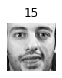

Cluster 90


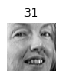

Cluster 91


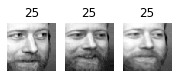

Cluster 92


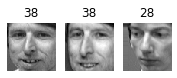

Cluster 93


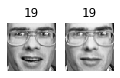

Cluster 94


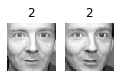

Cluster 95


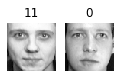

Cluster 96


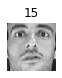

Cluster 97


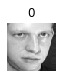

Cluster 98


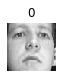

Cluster 99


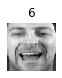

Cluster 100


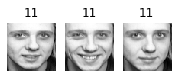

Cluster 101


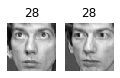

Cluster 102


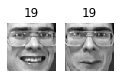

Cluster 103


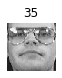

Cluster 104


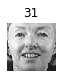

Cluster 105


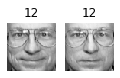

Cluster 106


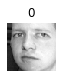

Cluster 107


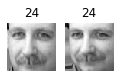

Cluster 108


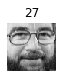

Cluster 109


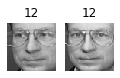

Cluster 110


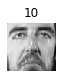

Cluster 111


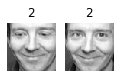

Cluster 112


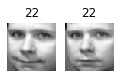

Cluster 113


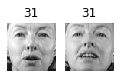

Cluster 114


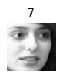

Cluster 115


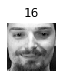

Cluster 116


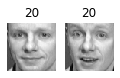

Cluster 117


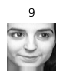

Cluster 118


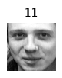

Cluster 119


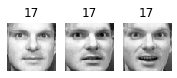

In [15]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Aproximadamente 2 de cada 3 agrupaciones son útiles: es decir, contienen al menos 2 fotos, todas de la misma persona. Sin embargo, el resto de las agrupaciones tienen uno o más intrusos, o sólo una imagen.

Agrupar las imágenes de esta manera puede ser demasiado impreciso para ser directamente útil a la hora de entrenar un modelo (como veremos más adelante), pero puede ser tremendamente útil a la hora de etiquetar imágenes en un nuevo conjunto de datos: normalmente hará que el etiquetado sea mucho más rápido.

## Using Clustering as Preprocessing for Classification

*Ejercicio: Siguiendo con el conjunto de datos de rostros Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen y evalúalo en el conjunto de validación.

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.925

*Ejercicio: A continuación, utilice K-Means como herramienta de reducción dimensional y entrene un clasificador en el conjunto reducido.

In [17]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.7

¡Caramba! Eso no es nada mejor. Veamos si afinar el número de clusters ayuda.

*Ejercicio: Buscar el número de conglomerados que permita al clasificador obtener el mejor rendimiento: ¿qué rendimiento puede alcanzar?*.

Podríamos utilizar una `GridSearchCV` como hicimos anteriormente en este cuaderno, pero como ya tenemos un conjunto de validación, no necesitamos la validación cruzada K-fold, y sólo estamos explorando un único hiperparámetro, por lo que es más sencillo ejecutar un bucle manualmente:

In [18]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=n_clusters)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3625
10 0.55
15 0.6125
20 0.6625
25 0.6625
30 0.7
35 0.6875
40 0.7125
45 0.7
50 0.7375
55 0.7375
60 0.75
65 0.725
70 0.7375
75 0.7875
80 0.7125
85 0.725
90 0.775
95 0.7625
100 0.65
105 0.7125
110 0.725
115 0.7625
120 0.7625
125 0.725
130 0.775
135 0.7375
140 0.7375
145 0.725


Bueno, incluso ajustando el número de conglomerados, nunca superamos el 80% de precisión. Parece que las distancias a los centroides de los clústeres no son tan informativas como las imágenes originales.

*Ejercicio: ¿Qué pasa si añades las características del conjunto reducido a las características originales (de nuevo, buscando el mejor número de conglomerados)?

In [19]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [20]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8125

Es un poco mejor, pero sigue siendo peor que sin las características de los clusters. En este caso, los clusters no son útiles para entrenar directamente un clasificador (pero pueden ayudar a etiquetar nuevas instancias de entrenamiento).

## A Gaussian Mixture Model for the Olivetti Faces Dataset

*Ejercicio: Entrene un modelo de mezcla gaussiana en el conjunto de datos de caras Olivetti. Para acelerar el algoritmo, probablemente deberías reducir la dimensionalidad del conjunto de datos (por ejemplo, utilizar PCA, preservando el 99% de la varianza).*

In [21]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

*Ejercicio: Usa el modelo para generar algunas caras nuevas (usando el método `sample()`), y visualízalas (si usaste PCA, necesitarás usar su método `inverse_transform()`).*

In [22]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

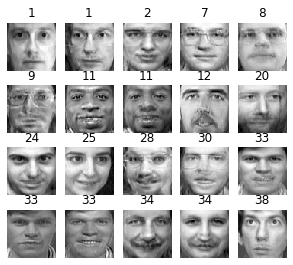

In [23]:
plot_faces(gen_faces, y_gen_faces)

*Ejercicio: Intente modificar algunas imágenes (por ejemplo, girarlas, voltearlas, oscurecerlas) y compruebe si el modelo puede detectar las anomalías (es decir, compare la salida del método `score_samples()` para imágenes normales y para anomalías).*

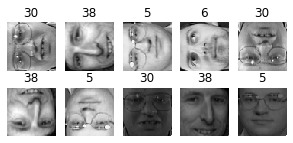

In [24]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [25]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [26]:
gm.score_samples(X_bad_faces_pca)

array([-2.43643150e+07, -1.89784991e+07, -3.78112161e+07, -4.98187638e+07,
       -3.20478804e+07, -1.37531031e+07, -2.92373904e+07, -1.05489264e+08,
       -1.19575656e+08, -6.74257782e+07])

El modelo de mezclas gaussianas considera que todas las caras malas son muy poco probables. Compárelo con las puntuaciones de algunas instancias de entrenamiento:

In [27]:
gm.score_samples(X_train_pca[:10])

array([1163.0202095 , 1134.03637995, 1156.32132802, 1170.67602773,
       1141.45404783, 1154.35205193, 1091.32894533, 1111.41149431,
       1096.43048989, 1132.98982741])

## Using Dimensionality Reduction Techniques for Anomaly Detection

*Ejercicio: Algunas técnicas de reducción de la dimensionalidad también pueden utilizarse para la detección de anomalías. Por ejemplo, tome el conjunto de datos de rostros Olivetti y redúzcalo con PCA, preservando el 99% de la varianza. A continuación, calcule el error de reconstrucción de cada imagen. A continuación, tome algunas de las imágenes modificadas que construyó en el ejercicio anterior y observe su error de reconstrucción: observe cuánto mayor es el error de reconstrucción. Si graficas una imagen reconstruida, verás por qué: intenta reconstruir una cara normal.*

Anteriormente ya redujimos el conjunto de datos mediante PCA:

In [28]:
X_train_pca

array([[ 3.78082848e+00, -1.85478747e+00, -5.14403582e+00, ...,
        -1.35635510e-01, -2.14079559e-01,  6.11926578e-02],
       [ 1.01488495e+01, -1.52754533e+00, -7.66978443e-01, ...,
         1.23931095e-01, -1.35269478e-01, -2.32696794e-02],
       [-1.00152884e+01,  2.87728882e+00, -9.19886231e-01, ...,
         7.26117715e-02, -2.96737882e-03,  1.24885648e-01],
       ...,
       [ 2.47586989e+00,  2.95597243e+00,  1.29985559e+00, ...,
        -2.09138989e-02,  3.48485485e-02, -1.54334918e-01],
       [-3.22031879e+00,  5.34897900e+00,  1.39427102e+00, ...,
         5.75523153e-02, -2.28309885e-01,  1.55576378e-01],
       [-9.22876537e-01, -3.64703059e+00,  2.26088119e+00, ...,
         1.36851206e-01, -6.91276789e-02,  6.26953915e-02]], dtype=float32)

In [29]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [30]:
reconstruction_errors(pca, X_train).mean()

0.00019205351

In [31]:
reconstruction_errors(pca, X_bad_faces).mean()

0.0047073546

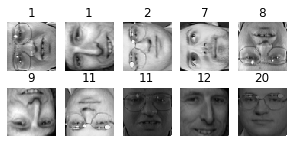

In [32]:
plot_faces(X_bad_faces, y_gen_faces)

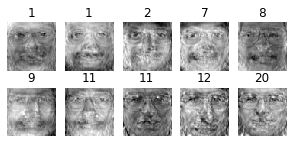

In [33]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_gen_faces)